In [5]:
import os
import numpy as np
import cv2
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [6]:
# Путь к датасету
dataset_path = 'dataset'


In [7]:
# Функция для загрузки изображений и меток
def load_data(dataset_path):
    images = []
    labels = []
    emotions = ['angry', 'happy', 'sad', 'fear']  # Убедитесь, что классы соответствуют вашим папкам

    for emotion in emotions:
        emotion_path = os.path.join(dataset_path, 'train', emotion)
        all_images = os.listdir(emotion_path)
        
        # Уменьшаем количество изображений в 2 раза
        selected_images = all_images[:len(all_images) // 3]  # Берем только половину изображений
        
        for img in tqdm(selected_images, desc=f'Loading {emotion} images'):
            img_path = os.path.join(emotion_path, img)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, (48, 48))  # Изменение размера изображения
            images.append(image.flatten())  # Преобразование в одномерный массив
            labels.append(emotion)

    return np.array(images), np.array(labels)


In [8]:
# Загрузка данных
X, y = load_data(dataset_path)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading fear images: 100%|██████████| 1367/1367 [00:00<00:00, 6218.47it/s]


In [9]:
# Обучение модели SVM 
model = svm.SVC(kernel='linear', C=1.0)

# Прогресс-бар 
epochs = 10  # Количество "эпох"
for epoch in tqdm(range(epochs), desc='Training epochs'):
    model.fit(X_train, y_train)


Training epochs: 100%|██████████| 10/10 [29:19<00:00, 175.92s/it]


In [10]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)


In [11]:
# Оценка модели
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

       angry       0.26      0.35      0.30       272
        fear       0.25      0.27      0.26       271
       happy       0.47      0.42      0.44       483
         sad       0.30      0.23      0.26       321

    accuracy                           0.33      1347
   macro avg       0.32      0.32      0.32      1347
weighted avg       0.34      0.33      0.33      1347


Confusion Matrix:


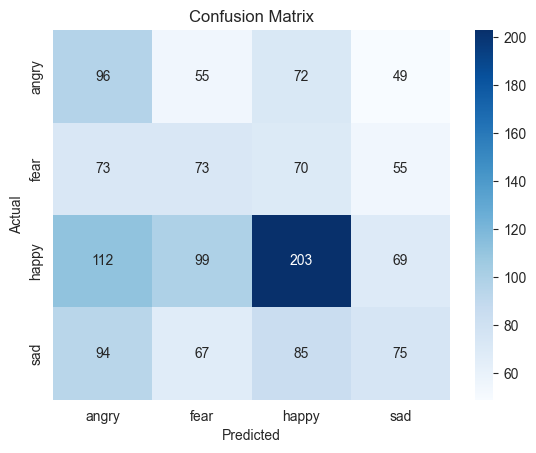

In [12]:
print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()
